#**Welcome to this Exploratory data anaysis tutorial with Emmanuel Kalibbala**  


# My goal with this tutorial is to provide you some very practical examples and tools in Python to examine data, make some key decisions on that data and show some ways of summarizing that data with statistical measures.

# The Agenda


*   1. Data Preparation and making data decisions
> *   Review of pandas
> *   Data types
> *   Basic statistical measures
> *   Null versus 0
> *   Interpolation
> *   Encoding of strings
*   
*   2. Statistical Exploration and Relationships
> *   Quartiles and Quantiles
> *   Outliers
> *   Error
> *   Regression
> *   Correlation


## Package installation
First we will gather the python packages we need.  With Colab, it comes pre-setup with all the statistical python packages, but we need to install the ones for reading some specific data we will be working with today - well logs.  For this tutorial we will use the lasio package for this specific subsurface datatype.

In [13]:
# !pip install lasio
# !pip install -r requirements.txt
# !pip install matplotlib
# !pip install plotly

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/df/79/c80174d711ee26ee5da55a9cc3e248f1ec7a0188b5e4d6bbbbcd09b974b0/plotly-5.17.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/f4/f1/990741d5bb2487d529d20a433210ffa136a367751e454214013b441c4575/tenacity-8.2.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB 1.9 MB/s eta 0:00:09
   ---------------------------------------- 0.1/15.6 MB 812.7 kB/s eta 0:00:20
   ---------------------------------------- 0.1/15.6 MB 762.6 kB/s eta 0:00:21
   ---------------------------------------- 0.1/15.6 MB 655.4 kB/s eta 0:00

Our basic packages today:

In [10]:
import lasio
import pandas as pd
import numpy as np
import scipy

Our plotting packages today: 

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.offsetbox import AnchoredText

# Loading Some Data

Today, we are working with a set of well log data taken from the Smeaheia CO2 project open dataset from Norway provided by Equinor and Gassnova.  You can read more about the dataset [here](https://co2datashare.org/dataset/smeaheia-dataset#org1228070)

The specifics of the data and its use is not so important for our tutorial today - what I will be showing can be applied to any dataset you may have in your own work.

In [16]:
# Uncomment when using google colab
# from google.colab import drive 
# drive.mount('/content/drive/')

In [ ]:
# Uncomment when using google colab
# filepath = r'/content/drive/My Drive/Smeaheia_well_logs/Well_Logs/data/32-2-1_transform.las'

In [23]:
# Uncomment when using a local file
filepath = r'C:\Users\EP KALIBBALA\Downloads\EDA\transform2021-statsbasics-main\data\Smeaheia_well_logs\Well_Logs\data\32-2-1_transform.las'

In [24]:
## Import the well log data
las = lasio.read(filepath)
wellname = las.well.WELL.value
curve_df=las.df()
curve_df=curve_df.reset_index()

Could not convert curve #17 to <class 'float'>


In [25]:
## Display 20 random rows from the dataset
curve_df.sample(20)

DEPT         AC  ACS     BS     CALI   CALI_2      DEN         DT  \
813   1087.6788  120.22121  NaN  8.500  8.45171  8.44781  2.42670  120.22108   
787   1071.8292  116.88558  NaN  8.500  8.45737  0.00000  2.19205  116.88560   
9      580.1300        NaN  NaN  9.875      NaN      NaN      NaN        NaN   
1064  1237.6404   87.50794  NaN  8.500  8.45452  8.45016  2.53403   87.50806   
816   1089.5076  114.64702  NaN  8.500  8.40943  8.40107  2.39567  114.64733   
751   1050.4932  110.32429  NaN  8.500  8.40632  8.43600  2.20464  110.32516   
201    697.8396  133.92926  NaN  9.875      NaN      NaN      NaN  133.92361   
901   1140.1044  108.72462  NaN  8.500  8.52170  8.49583  2.25622  108.72407   
302    758.1900  136.96399  NaN  9.875      NaN      NaN      NaN  136.97241   
789   1073.0484  102.03680  NaN  8.500  8.40630  0.00000  2.39811  102.03572   
924   1154.1252  108.16582  NaN  8.500  8.59039  8.60480  2.35174  108.16643   
603    961.4916  106.54735  NaN  8.500  8.39060  8.38500  2.43935  106.54065   
80     625.9068  145.90709  NaN  9.875      NaN      NaN      NaN  145.91032   
750   1049.8836  109.91042  NaN  8.500  8.43990  8.43750  2.27806  109.91051   
584    950.5188  107.05617  NaN  8.500  8.41579  8.40594  2.29314  107.06247   
420    852.3732  138.82062  NaN  8.500  9.25447  9.25356  2.23872  138.82013   
773   1063.9044  112.20654  NaN  8.500  8.45098  8.45062  2.29190  112.20559   
219    708.8124  132.31644  NaN  9.875      NaN      NaN      NaN  132.32085   
320    769.1628  135.41997  NaN  9.875      NaN      NaN      NaN  135.41685   
317    767.3340  137.21654  NaN  9.875      NaN      NaN      NaN  137.21155   

      DTS         GR  ...     RDEP     RHOB     SWE     VSH  LITHOLOGY  \
813   NaN   97.62893  ...  2.54177  2.42672  1.0000  0.8638      shale   
787   NaN   65.66344  ...  0.82880  2.19205  1.0000  0.2078       silt   
9     NaN   34.29819  ...  1.05004      NaN     NaN     NaN        nan   
1064  NaN  108.86054  ...  4.89579  2.53403  0.9272  0.8225      shale   
816   NaN  103.11636  ...  2.44385  2.39567  1.0000  0.9733      shale   
751   NaN   65.78127  ...  3.78245  2.20458  1.0000  0.0000        nan   
201   NaN   70.53152  ...  2.48095      NaN     NaN     NaN        nan   
901   NaN   73.15631  ...  2.33116  2.25621  0.6912  0.3967       silt   
302   NaN  100.41805  ...  1.89097      NaN     NaN     NaN        nan   
789   NaN  105.25108  ...  2.13463  2.39811  1.0000  0.8201      shale   
924   NaN  103.97072  ...  2.43596  2.35172  0.7579  0.5798      shale   
603   NaN   85.74838  ...  3.53994  2.43943  1.0000  0.4700       silt   
80    NaN   86.61014  ...  2.85648      NaN     NaN     NaN        nan   
750   NaN   66.77787  ...  0.91289  2.27808  1.0000  0.2097       silt   
584   NaN   75.46445  ...  0.94684  2.29337  1.0000  0.0000        nan   
420   NaN  122.96225  ...  1.66615  2.23879     NaN     NaN        nan   
773   NaN   94.28615  ...  1.88330  2.29189  0.8368  0.5614      shale   
219   NaN   72.42470  ...  2.19516      NaN     NaN     NaN        nan   
320   NaN   94.11919  ...  1.80799      NaN     NaN     NaN        nan   
317   NaN   94.77493  ...  1.80680      NaN     NaN     NaN        nan   

      CORE_PHIE_1  CORE_PHIE_2 CORE_PHIE_3  CORE_PHIE_4  CORE_PHIE_5  
813           NaN          NaN         NaN          NaN          NaN  
787           NaN          NaN         NaN          NaN          NaN  
9             NaN          NaN         NaN          NaN          NaN  
1064          NaN          NaN         NaN          NaN          NaN  
816           NaN          NaN         NaN          NaN          NaN  
751           NaN          NaN         NaN          NaN          NaN  
201           NaN          NaN         NaN          NaN          NaN  
901           NaN          NaN         NaN          NaN          NaN  
302           NaN          NaN         NaN          NaN          NaN  
789           NaN          NaN         NaN          NaN          

## Yes, this is real data:

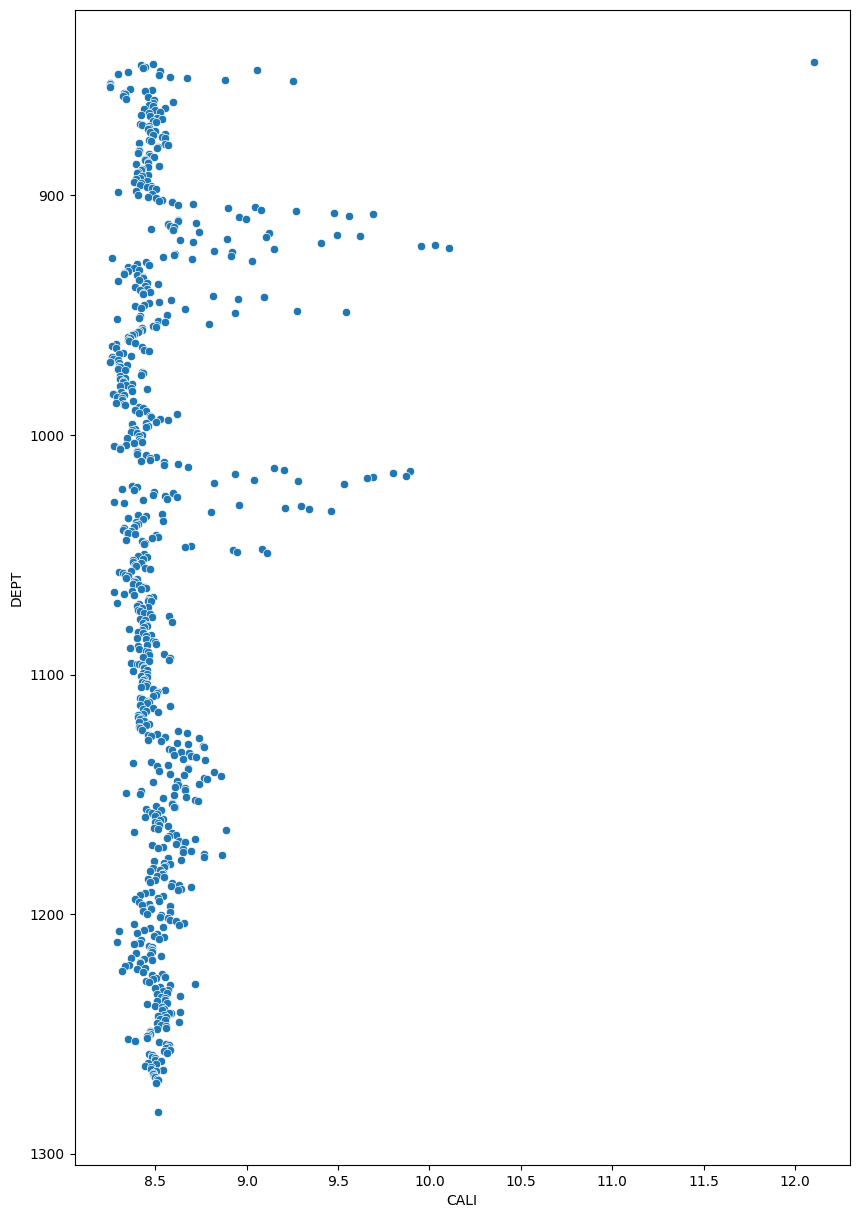

In [26]:
# Plot the caliper versus depth
plt.figure(figsize=[10,15])
sns.scatterplot(data=curve_df, x="CALI", y="DEPT")
plt.gca().invert_yaxis()

# Data Types, Precision and Basic Statistical Measurements

## Data Types

A good place to start with a dataset is understanding what kinds of data do you have.

In [27]:
curve_df.dtypes

DEPT           float64
AC             float64
ACS            float64
BS             float64
CALI           float64
CALI_2         float64
DEN            float64
DT             float64
DTS            float64
GR             float64
NEU            float64
PHIE           float64
PHIT           float64
RDEP           float64
RHOB           float64
SWE            float64
VSH            float64
LITHOLOGY       object
CORE_PHIE_1    float64
CORE_PHIE_2    float64
CORE_PHIE_3    float64
CORE_PHIE_4    float64
CORE_PHIE_5    float64
dtype: object

What are the different data types ?

In our dataset we have two different ones - float64 and object.  But there are others.


*   numeric values: 2.2222222222 (dtypes: float64, float32)
*   numeric values: 2222222 (dtypes: int64, int32)
*   non-numeric value: 'hello', '2', ['hello', 222] (dtypes: object)
*   date: 2021-14-04 (dtypes: datetime)
*   Boolean: True, False (dtypes: bool)


Please refer to pandas documentation for even more detail.

## Precision and decimal places

**Precision** in our context here is the number of digits used to describe the value.  Often we think of this as how many decimal places do I need to accurately describe this data?  

When pandas loads in data, **it is honest to the precision in the original data** - though it may not show you all the decimal places when you view a dataframe.  We can change that display.  

Our original .las file has up to 5 decimal places in the data.

In [28]:
##Display only the first 3 decimals - only display, original data is still in memory!

pd.set_option("display.precision", 3)  

In [29]:
curve_df.sample(10)

DEPT       AC      ACS     BS   CALI  CALI_2    DEN       DT  \
455    873.100  128.881      NaN  8.500  8.495   8.498  2.294  128.874   
1086  1250.442   83.520  168.654  8.500  8.462   8.464  2.492   83.520   
174    681.990  128.605      NaN  9.875    NaN     NaN    NaN  128.605   
217    707.593  135.757      NaN  9.875    NaN     NaN    NaN  135.768   
561    936.498  115.625      NaN  8.500  8.454   8.457  2.301  115.623   
480    888.340  119.926      NaN  8.500  8.460   8.460  2.374  119.926   
914   1148.029  112.557      NaN  8.500  8.661   8.632  2.178  112.557   
43     601.218  175.813      NaN  9.875    NaN     NaN    NaN  175.801   
1076  1244.346   81.046      NaN  8.500  8.550   8.549  2.493   81.046   
656    993.191  115.849      NaN  8.500  8.523   8.490  2.684  115.850   

          DTS       GR  ...   RDEP   RHOB    SWE    VSH  LITHOLOGY  \
455       NaN  124.436  ...  2.005  2.294    NaN    NaN        nan   
1086  168.656  119.615  ...  5.026  2.492  0.839  0.469       silt   
174       NaN   80.997  ...  2.918    NaN    NaN    NaN        nan   
217       NaN   78.322  ...  2.036    NaN    NaN    NaN        nan   
561       NaN  100.666  ...  1.869  2.301  0.938  0.693      shale   
480       NaN   98.942  ...  2.430  2.374    NaN    NaN        nan   
914       NaN   77.963  ...  0.975  2.178  0.966  0.196       sand   
43        NaN   33.114  ...  1.310    NaN    NaN    NaN        nan   
1076      NaN  109.818  ...  6.857  2.493  0.707  0.518      shale   
656       NaN   80.972  ...  4.912  2.684  1.000  0.501      shale   

      CORE_PHIE_1  CORE_PHIE_2 CORE_PHIE_3  CORE_PHIE_4  CORE_PHIE_5  
455           NaN          NaN         NaN          NaN          NaN  
1086          NaN          NaN         NaN          NaN          NaN  
174           NaN          NaN         NaN          NaN          NaN  
217           NaN          NaN         NaN          NaN          NaN  
561           NaN          NaN         NaN          NaN          NaN  
480           NaN          NaN         NaN          NaN          NaN  
914           NaN          NaN         NaN          NaN          NaN  
43            NaN          NaN         NaN          NaN          NaN  
1076          NaN          NaN         NaN          NaN          NaN  
656           NaN          NaN         NaN          NaN          NaN  

[10 rows x 23 columns]

But what if we actually want to change the precision on some data?  For the CALI curve, which measures in inches the diameter of the borehole, do you really think we measure down to the nano-meter?  Precision to 5 decimals is not real here.  Let's change that.

In [30]:
## Change precision on Caliper by rounding to 2 decimal places.  This is a hard change to the data in memory.
curve_df["CALI"] = curve_df["CALI"].round(2)

In [31]:
curve_df["CALI"].iloc[700:710]

700    8.82
701    9.53
702    8.37
703    8.40
704    8.32
705    8.38
706    8.49
707    8.59
708    8.49
709    8.55
Name: CALI, dtype: float64

## Basic Statistical Measurements with Pandas

### df.describe is your friend

In [32]:
## df.describe is often one of the first things we use when we have a new dataset.
## Note: no statistic for the lithology curves !

curve_df.describe()

DEPT        AC      ACS        BS     CALI   CALI_2      DEN  \
count  1120.000  1104.000   61.000  1114.000  713.000  713.000  711.000   
mean    925.331   119.101  183.523     8.995    8.538    8.230    2.325   
std     208.018    21.672   10.945     0.660    0.282    1.628    0.138   
min       0.000    54.716  156.611     8.500    8.250    0.000    1.973   
25%     745.236   106.587  178.124     8.500    8.410    8.401    2.224   
50%     935.584   116.820  184.980     8.500    8.470    8.471    2.313   
75%    1103.071   135.048  190.989     9.875    8.560    8.565    2.421   
max    1282.680   205.640  203.814     9.875   12.110   12.146    2.697   

             DT      DTS        GR  ...       PHIT      RDEP     RHOB  \
count  1104.000   61.000  1114.000  ...  6.160e+02  1113.000  711.000   
mean    119.101  183.523    89.415  ...  2.042e-01     3.381    2.325   
std      21.672   10.945    20.930  ...  7.347e-02    29.979    0.138   
min      54.713  156.610     7.481  ...  6.000e-04     0.218    1.973   
25%     106.586  178.122    76.817  ...  1.413e-01     1.534    2.224   
50%     116.820  184.981    86.644  ...  2.208e-01     2.134    2.313   
75%     135.037  190.989   102.434  ...  2.702e-01     2.666    2.421   
max     205.630  203.814   196.200  ...  3.000e-01  1000.000    2.697   

           SWE      VSH  CORE_PHIE_1  CORE_PHIE_2  CORE_PHIE_3  CORE_PHIE_4  \
count  616.000  616.000        2.000         2.00        2.000         1.00   
mean     0.933    0.410        0.195         0.18        0.155         0.32   
std      0.090    0.291        0.134         0.17        0.177          NaN   
min      0.637    0.000        0.100         0.06        0.030         0.32   
25%      0.877    0.158        0.147         0.12        0.092         0.32   
50%      0.997    0.389        0.195         0.18        0.155         0.32   
75%      1.000    0.661        0.242         0.24        0.218         0.32   
max      1.000    1.000        0.290         0.30        0.280         0.32   

       CORE_PHIE_5  
count        2.000  
mean         0.425  
std          0.106  
min          0.350  
25%          0.387  
50%          0.425  
75%          0.463  
max          0.500  

[8 rows x 22 columns]

### What are count, mean, std, min, 25%, 50%, 75%, and max?

Let's start with the **count** - take a look at the depth statistics.

Compare depth which is our "index" with the other curves.  In the ideal world, we would have a sample for each column at every depth sample...but the counts tell us differently.

Then let's look at the min, 25%, 50%, 75% and max for the GR (gamma ray).

Min and max stand for minimum and maximum - this is pretty straightforward.

25% is the number where the other 75% are greater than it.
50% is what is called the median - half the data is less than that value and half the count of data is more than that value.

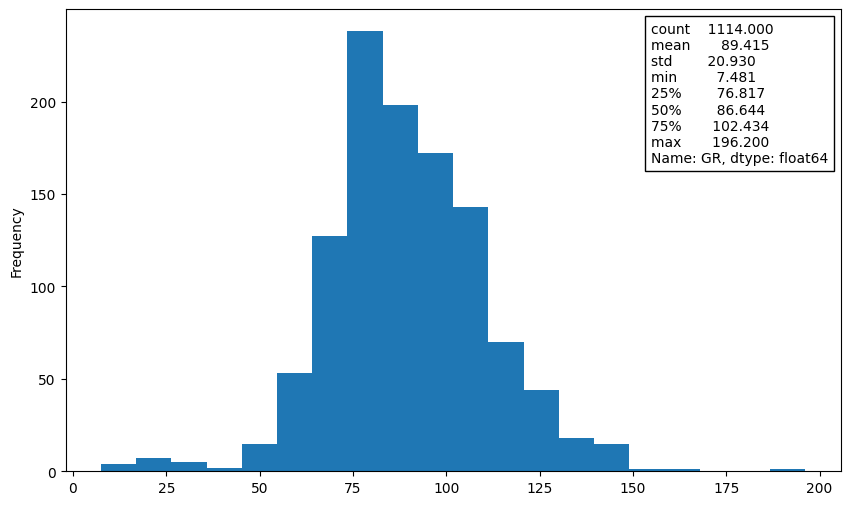

In [33]:
fig, ax = plt.subplots(figsize=(10,6))

curve_df['GR'].plot.hist(bins=20) #this is the type of plot and which data
anchored_text = AnchoredText(str(curve_df['GR'].describe()), loc=1)
ax.add_artist(anchored_text)

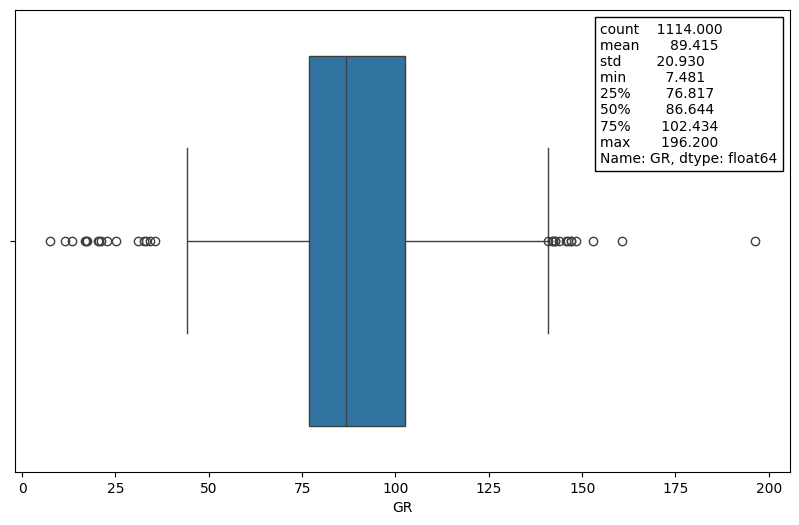

In [34]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(data=curve_df, x="GR")

anchored_text = AnchoredText(str(curve_df['GR'].describe()), loc=1)
ax.add_artist(anchored_text)

### Interactive ploting can help

Interactive plotting can be helpful here to be able to visualize the data distribution AND read the summarizing values off the plot.  Plotly express is one Python package that allows for this:

In [37]:
px.box(curve_df, x='GR', orientation='h')

In [36]:
px.box(curve_df, x='GR', orientation='h', points='all')

We will come back to the whiskers "fence" measurements later.

Last, lets discuss the mean and the standard deviation.  The mean is the addition of all the sample values divided by the count.  The standard deviation describes the spread of the data around the mean.

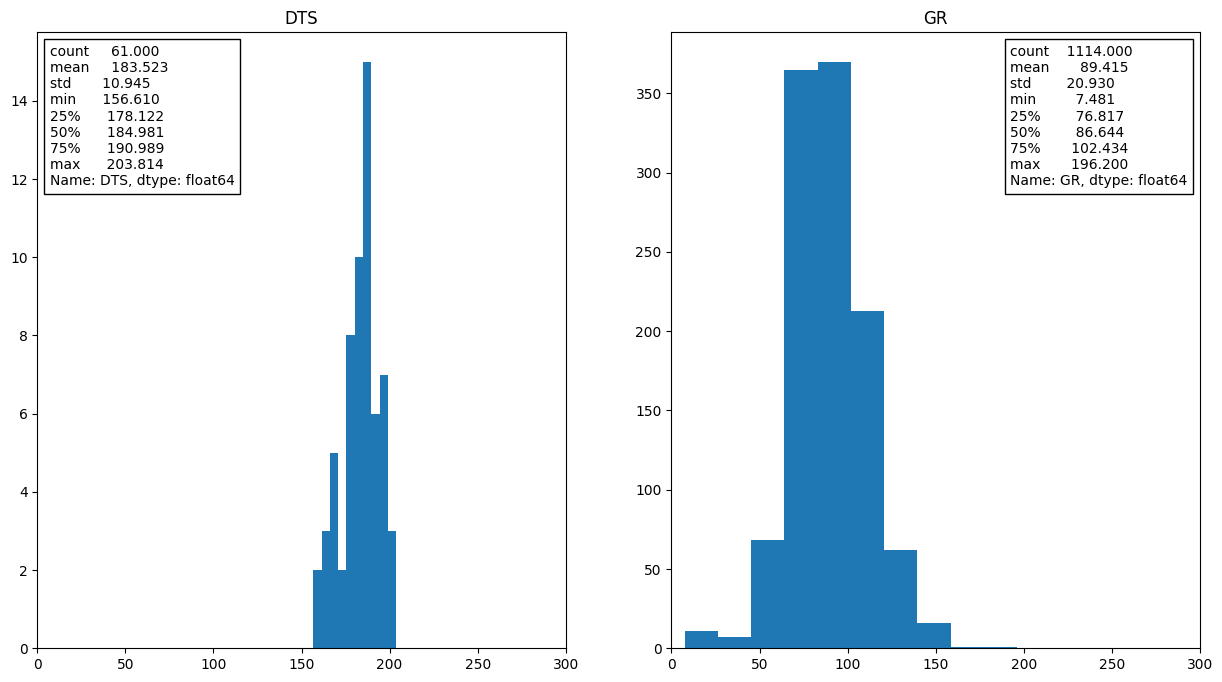

In [38]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2 , figsize=(15,8))

ax0.hist(curve_df['DTS'])
ax0.set_title('DTS')
ax0.set_xlim(0,300)

ax1.hist(curve_df['GR'])
ax1.set_title('GR')
ax1.set_xlim(0,300)

anchored_text = AnchoredText(str(curve_df['DTS'].describe()), loc=2)
ax0.add_artist(anchored_text)

anchored_text = AnchoredText(str(curve_df['GR'].describe()), loc=1)
ax1.add_artist(anchored_text)

# Null versus 0s

## Concepts of empty

Perhaps one of the most important decisions in preparing data for analysis is how you handle invalid or "empty" data samples.  Depending on where your data is from, the concept of empty, invalid, or "not applicable" can be registered differently. 

In Python, 0 does not mean "empty" or "null!  It is a valid integer and there are many cases when 0 is a totaly valid integer value (think about boolean!)

In [39]:
## Let's ask Python what it thinks about 0

type(0)

int

### np.nan

The numpy package in python provides us with the "value" that indicates null or empty.  We call this np.nan.  

It is very important in our analysis if we use 0 to describe empty data samples or np.nan as 0 is counted as a valid value, and np.nan *is excluded from python analyses!*

Happily for us, the lasio python package we used to load our well log data, was able to recognize the format that null was in and automatically converted that data to NaN (np.nan) for us!  But as we will discuss below, this is not always going to happen for you!

In [40]:
## Let's check that the null values were loaded in as nans by looking at the first few rows of the dataset.
## In well log data, typically you have many null values at the beginning of the dataset, before the measurement tool starts taking measurements.

curve_df.head()

DEPT  AC  ACS  BS  CALI  CALI_2  DEN  DT  DTS  GR  ...  RDEP  RHOB  SWE  \
0    0.00 NaN  NaN NaN   NaN     NaN  NaN NaN  NaN NaN  ...   NaN   NaN  NaN   
1   26.00 NaN  NaN NaN   NaN     NaN  NaN NaN  NaN NaN  ...   NaN   NaN  NaN   
2  377.00 NaN  NaN NaN   NaN     NaN  NaN NaN  NaN NaN  ...   NaN   NaN  NaN   
3  387.03 NaN  NaN NaN   NaN     NaN  NaN NaN  NaN NaN  ...   NaN   NaN  NaN   
4  404.17 NaN  NaN NaN   NaN     NaN  NaN NaN  NaN NaN  ...   NaN   NaN  NaN   

   VSH  LITHOLOGY  CORE_PHIE_1  CORE_PHIE_2 CORE_PHIE_3  CORE_PHIE_4  \
0  NaN        nan          NaN          NaN         NaN          NaN   
1  NaN        nan          NaN          NaN         NaN          NaN   
2  NaN        nan          NaN          NaN         NaN          NaN   
3  NaN        nan          NaN          NaN         NaN          NaN   
4  NaN        nan          NaN          NaN         NaN          NaN   

   CORE_PHIE_5  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 23 columns]

In [41]:
## Let's make sure that the NaN values in our dataframe are truly np.nan

pd.isna(curve_df).head()

DEPT    AC   ACS    BS  CALI  CALI_2   DEN    DT   DTS    GR  ...  RDEP  \
0  False  True  True  True  True    True  True  True  True  True  ...  True   
1  False  True  True  True  True    True  True  True  True  True  ...  True   
2  False  True  True  True  True    True  True  True  True  True  ...  True   
3  False  True  True  True  True    True  True  True  True  True  ...  True   
4  False  True  True  True  True    True  True  True  True  True  ...  True   

   RHOB   SWE   VSH  LITHOLOGY  CORE_PHIE_1  CORE_PHIE_2  CORE_PHIE_3  \
0  True  True  True      False         True         True         True   
1  True  True  True      False         True         True         True   
2  True  True  True      False         True         True         True   
3  True  True  True      False         True         True         True   
4  True  True  True      False         True         True         True   

   CORE_PHIE_4  CORE_PHIE_5  
0         True         True  
1         True         True  
2         True         True  
3         True         True  
4         True         True  

[5 rows x 23 columns]

First off we see that something isn't right in LITHOLOGY.  'nan' is being used as a literal string.  We'll come back to this.  

But, there is something more sinister hidden that this boolean check won't tell us. Let's compare the data for the two Caliper measurements.

C:\Users\EP KALIBBALA\AppData\Local\Temp\ipykernel_4632\1097250180.py:7: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



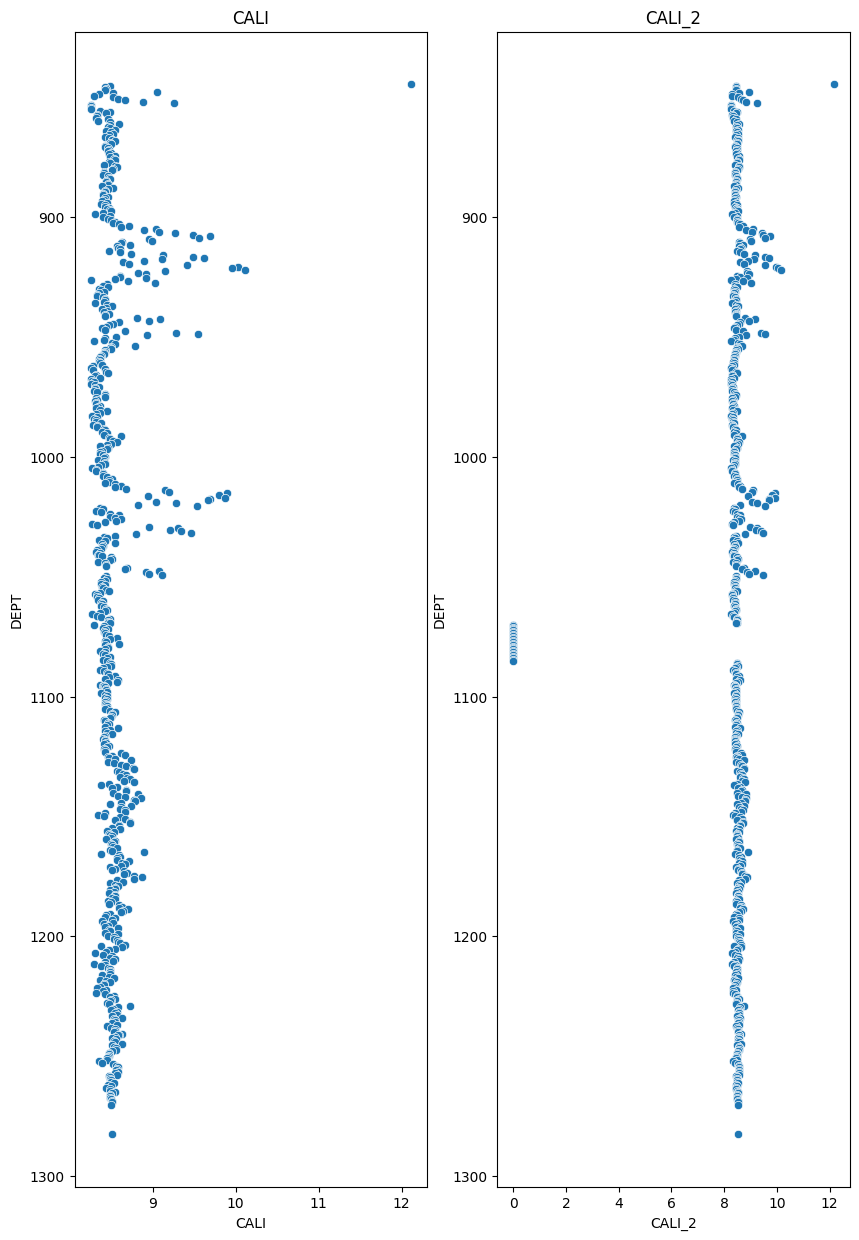

In [42]:
fig, (ax1, ax2) = plt.subplots(figsize=(10,15), ncols=2, sharey=False)
sns.scatterplot(data=curve_df, x="CALI", y="DEPT", ax=ax1).set_title('CALI')
ax1.invert_yaxis()
sns.scatterplot(data=curve_df, x="CALI_2", y="DEPT", ax=ax2).set_title('CALI_2')
ax2.invert_yaxis()

fig.show()

In [43]:
curve_df['CALI_2'].describe()

count    713.000
mean       8.230
std        1.628
min        0.000
25%        8.401
50%        8.471
75%        8.565
max       12.146
Name: CALI_2, dtype: float64

0s are not valid for caliper data!  We cannot have a 0 diameter well bore!  This means the statistics above are not valid for CALI_2 since pandas sees 0s as valid measurements. We need to do something to "fix" this data. 


## Replacing Values

We can quickly change values in a pandas dataframe or in a single column with the replace function.

In [44]:
## Let's make the 0s in CALI_2 null values instead, so that they don't get included in our plots or in our statistics

curve_df['CALI_2'] = curve_df['CALI_2'].replace(0,np.nan)

In [45]:
## Notice that the np.nan values are not included in the statistics

curve_df['CALI_2'].describe()

count    687.000
mean       8.542
std        0.291
min        8.250
25%        8.411
50%        8.477
75%        8.565
max       12.146
Name: CALI_2, dtype: float64

In [46]:
## Let's also fix up our Lithology column since replace will also work for strings!

curve_df['LITHOLOGY'] = curve_df['LITHOLOGY'].replace('nan',np.nan)

In [47]:
curve_df['LITHOLOGY'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: LITHOLOGY, dtype: object

An important tip with handling null and 0 is to be consistant in how you treat the data in your project or analysis.  We just looked at CALI_2 and LITHOLOGY in this case, but we would want to ensure that all the data are handled in a standard way in regards to when samples are valid or not and how they are represented by python.

# Interpolation

But what to do with this gap we now have in CALI_2?  You have several options:

1.   Leave it as NaN
2.   Fill in the gap with non-measured data values based of other data

Another big decision when dealing with a dataset that perhaps you want to take into more complex analysis is what to do with gaps or holes in the sampling.  The way you handle this typicaly depends on what the end goal is.  If the gaps are in unimportant places (like the top of a well log) we can probably be ok leaving them if we are interested in the lower sections of the well specifically.  However, the gap in the CALI_2 curve is in an important place - we may simply need the numbers here, even if they are "inferred".


How much "fake" data are you ok creating?  This is a decision that needs to be handled with care..

There are many ways to create data in gaps, I will touch on two basic ones.

In [48]:
curve_df['CALI_2'].describe()

count    687.000
mean       8.542
std        0.291
min        8.250
25%        8.411
50%        8.477
75%        8.565
max       12.146
Name: CALI_2, dtype: float64

Here is a close up of our "gap" in CALI_2:

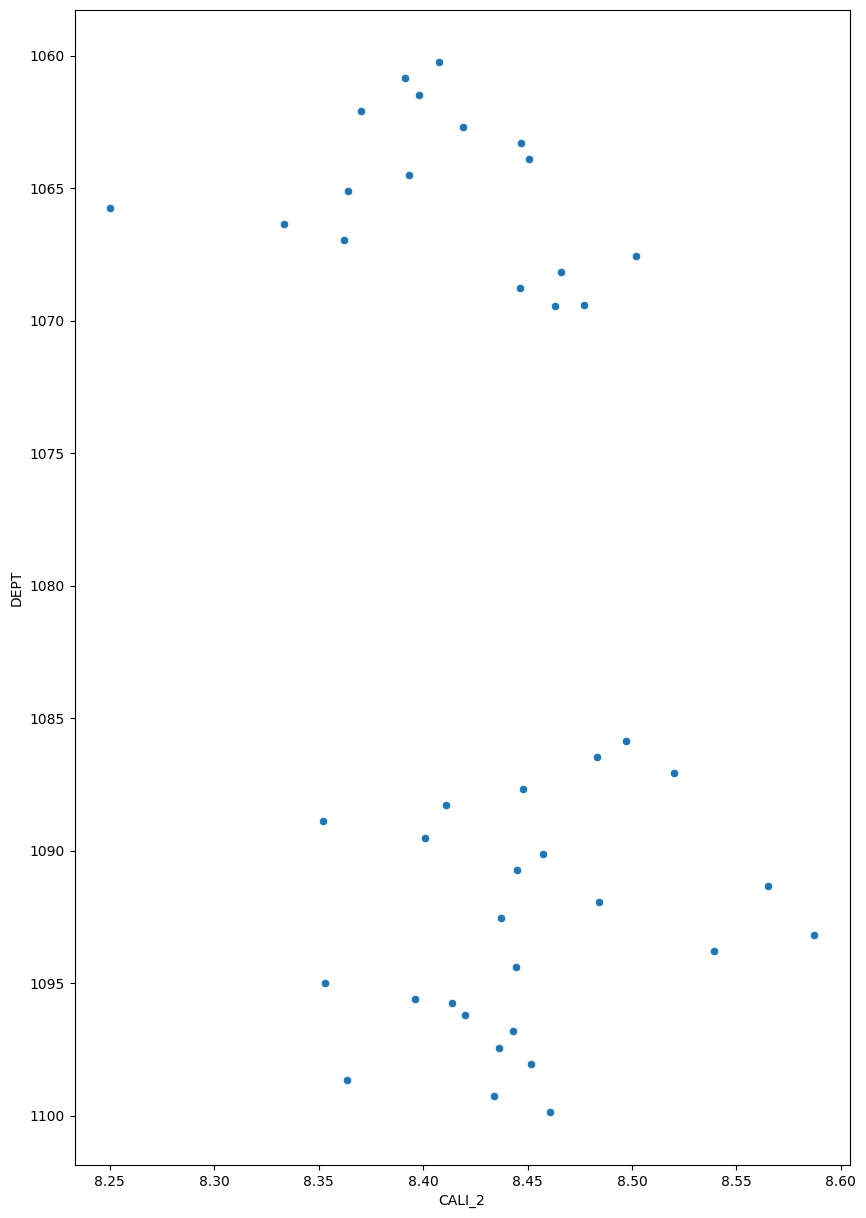

In [49]:
## We'll put this gap into a smaller dataframe to investigate specifically around this gap first.
small_df = curve_df[curve_df['DEPT'].between(1060, 1100)] 

plt.figure(figsize=[10,15])
sns.scatterplot(data=small_df, x="CALI_2", y="DEPT")
plt.gca().invert_yaxis()

In [ ]:
pd.set_option('display.max_rows', None)
small_df['CALI_2']

## Linear Interpolation

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/LinearInterpolation.svg/600px-LinearInterpolation.svg.png)

Concept is quite simple, you can predict values between two given values by drawing a straight line connecting them.  Then anywhere on that line you can take a new value.



In [50]:
## Linear Interpolation is the default method in Pandas - let's create a new column with that small gap interpolated now.

small_df['CALI_2_linear'] = small_df['CALI_2'].interpolate()

C:\Users\EP KALIBBALA\AppData\Local\Temp\ipykernel_4632\3207327899.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Padding

Another simple way of interpolating data is to just give it a single value and fill that one value in for each missing sample.  This is called padding.

In [51]:
## Now we will specify the pad method in Panda's interpolation method which will pad with the last seen number before the gap:

small_df['CALI_2_pad'] = small_df['CALI_2'].interpolate(method='pad')


C:\Users\EP KALIBBALA\AppData\Local\Temp\ipykernel_4632\1570798903.py:3: FutureWarning:

Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\EP KALIBBALA\AppData\Local\Temp\ipykernel_4632\1570798903.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\EP KALIBBALA\AppData\Local\Temp\ipykernel_4632\1006309532.py:9: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



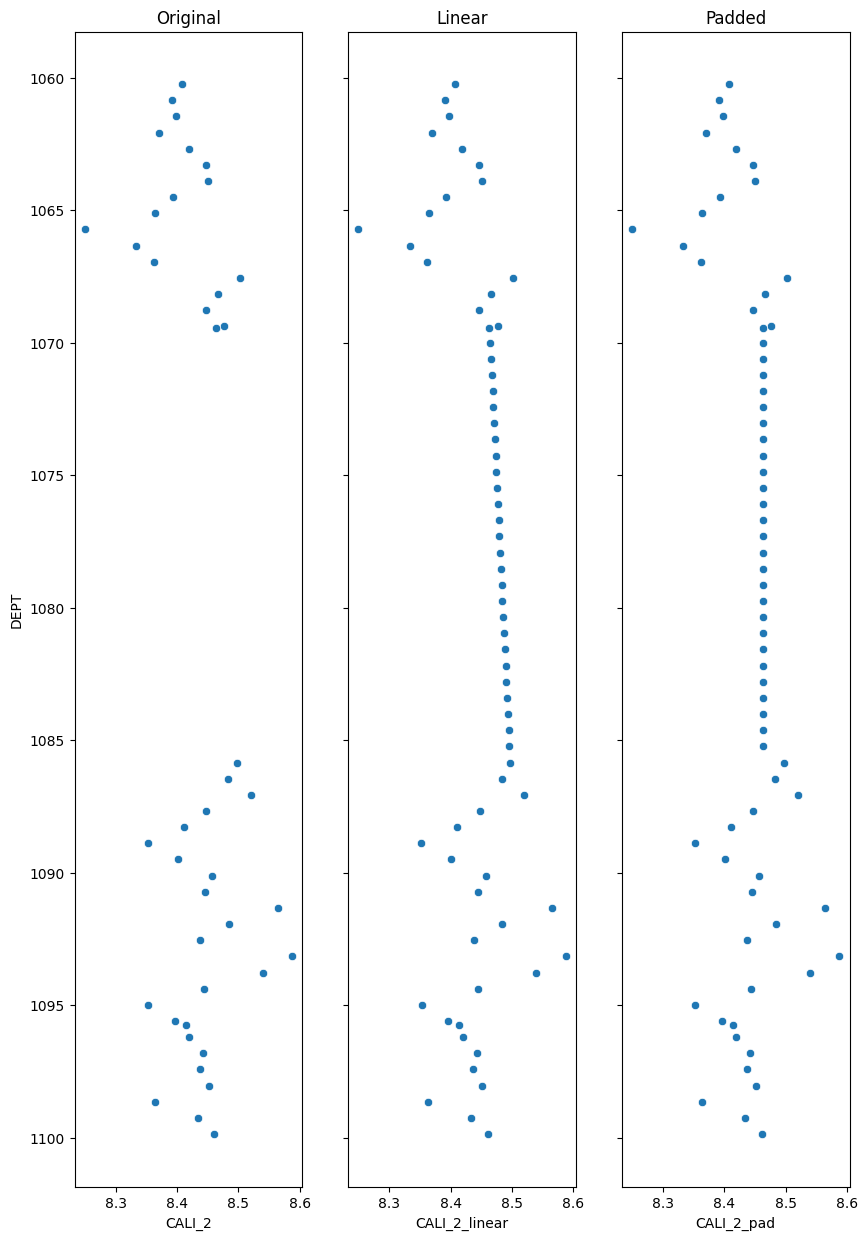

In [52]:
## Let's compare the different interpolation types against the original CALI_2:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(10,15), ncols=3, sharey=True)
sns.scatterplot(data=small_df, x="CALI_2", y="DEPT", ax=ax1).set_title('Original')
ax1.invert_yaxis()
sns.scatterplot(data=small_df, x="CALI_2_linear", y="DEPT", ax=ax2).set_title('Linear')
ax2.invert_yaxis()
sns.scatterplot(data=small_df, x="CALI_2_pad", y="DEPT", ax=ax3).set_title('Padded')
ax3.invert_yaxis()
fig.show()


In [53]:
small_df[['CALI_2','CALI_2_linear','CALI_2_pad']].describe()

CALI_2  CALI_2_linear  CALI_2_pad
count  42.000         68.000      68.000
mean    8.433          8.451       8.445
std     0.063          0.055       0.052
min     8.250          8.250       8.250
25%     8.397          8.420       8.420
50%     8.440          8.466       8.463
75%     8.463          8.484       8.463
max     8.587          8.587       8.587

But the effect of interpolation in this case is minimal.  Let's use the default linear interpolation on the original dataset.



In [54]:
curve_df['CALI_2'].describe()

count    687.000
mean       8.542
std        0.291
min        8.250
25%        8.411
50%        8.477
75%        8.565
max       12.146
Name: CALI_2, dtype: float64

In [55]:
curve_df['CALI_2'].interpolate(inplace=True)

In [56]:
curve_df['CALI_2'].describe()  #very small impact.  But watch out for this!

count    713.000
mean       8.540
std        0.286
min        8.250
25%        8.414
50%        8.477
75%        8.565
max       12.146
Name: CALI_2, dtype: float64

Main point here is that too much interpolation can drastically change the original data to something that may not be "real".  Keep on eye on how interpolation changes the distribution of your data.


# Encoding of Strings

How to get an overview of the lithology data ? df.describe() does not work on objects.

In [57]:
## Display unique values of lithology

curve_df['LITHOLOGY'].unique()

array([nan, 'sand', 'silt', 'shale'], dtype=object)

TypeError: no numeric data to plot

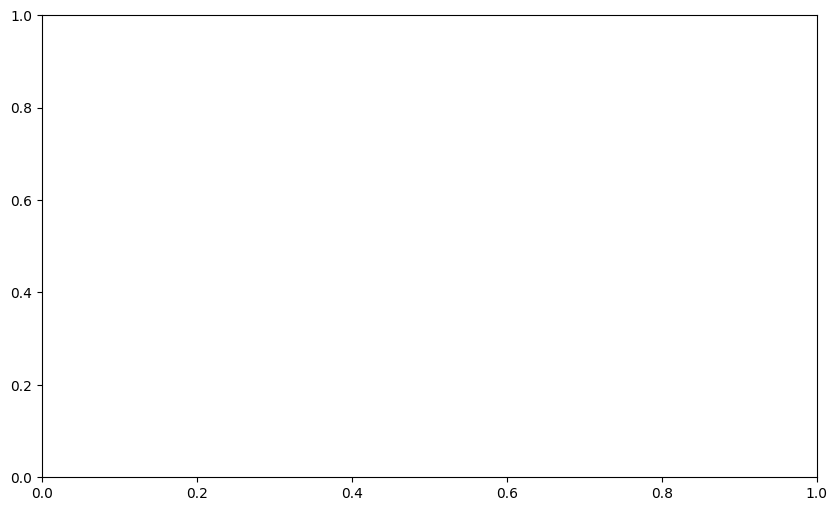

In [58]:
## Plot the lithology to check what is the percentage of sand/silt/shale ?

plt.figure(figsize=[10,6])
curve_df['LITHOLOGY'].plot.hist(bins=20)

In [59]:
## Assign the different lithologies to categories

curve_df['LITHOLOGY'] = curve_df['LITHOLOGY'].astype('category')


In [60]:
## Assign a code to each catergory

curve_df['LITHOLOGY_code'] = curve_df['LITHOLOGY'].cat.codes

In [61]:
## Display the codes. But what litholgy were assigned to 0 ? 2 ? 1? 

curve_df['LITHOLOGY_code'].unique()

array([-1,  0,  2,  1], dtype=int8)

In [62]:
curve_df[['LITHOLOGY','LITHOLOGY_code']].sample(20)

LITHOLOGY  LITHOLOGY_code
82         NaN              -1
285        NaN              -1
434        NaN              -1
1001      silt               2
345        NaN              -1
366        NaN              -1
77         NaN              -1
607       silt               2
296        NaN              -1
875       silt               2
789      shale               1
168        NaN              -1
1094     shale               1
279        NaN              -1
573       sand               0
322        NaN              -1
191        NaN              -1
172        NaN              -1
218        NaN              -1
67         NaN              -1

In [63]:
## Make a dictionnary of the codes and associated lithology 

dict(enumerate(curve_df['LITHOLOGY'].cat.categories))

{0: 'sand', 1: 'shale', 2: 'silt'}

<Axes: ylabel='Frequency'>

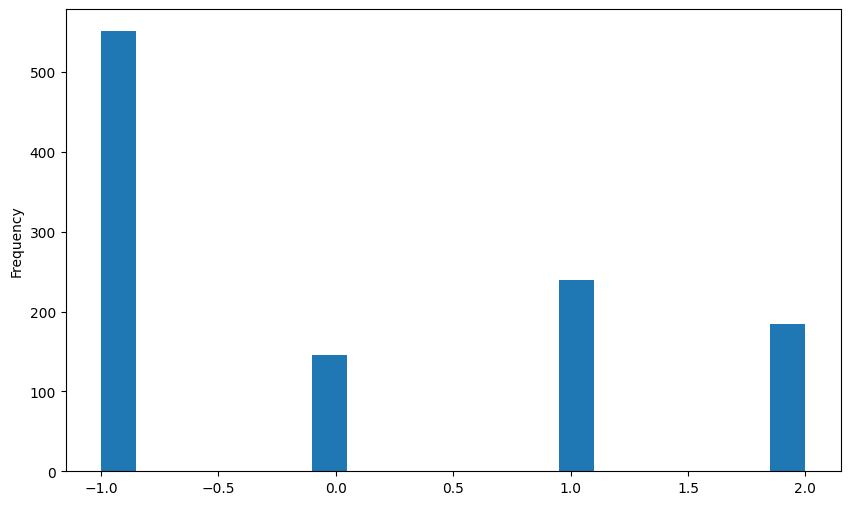

In [64]:
plt.figure(figsize=[10,6])
curve_df['LITHOLOGY_code'].plot.hist(bins=20)

Are you really interested in the empty values ?  

No, it is better not to encode them. 

In [65]:
curve_df['LITHOLOGY_code'] = curve_df['LITHOLOGY_code'].replace(-1,np.nan)

<Axes: ylabel='Frequency'>

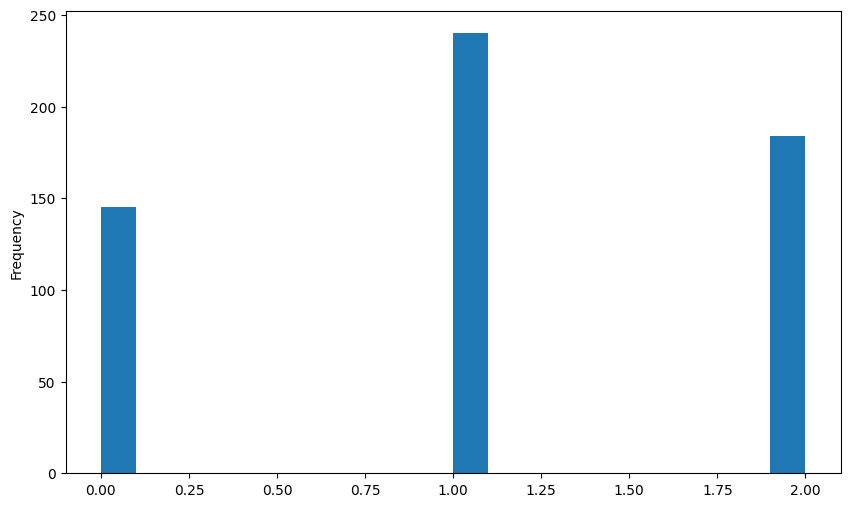

In [66]:
plt.figure(figsize=[10,6])
curve_df['LITHOLOGY_code'].plot.hist(bins=20)

In [67]:
curve_df['LITHOLOGY_code'].describe()

count    569.000
mean       1.069
std        0.758
min        0.000
25%        0.000
50%        1.000
75%        2.000
max        2.000
Name: LITHOLOGY_code, dtype: float64

<p><img src="https://www.travelbirdie.me/wp-content/uploads/2016/10/Take-a-break-1.jpg" ></p>

# Quartiles and Quantiles

Often we want to compare the distribution of a dataset to another or to a specific model.  Eyeballing the plots is one way to do it, but using comparison of the quantiles is more revealing and more quantifiable then trying to overlay histograms!

Quantiles are simply buckets with an upper and lower value that within that bucket contain a certain percentage of the total dataset.  We've already looked at quartiles, which are just the .25, .50 (median), and .75 quantiles.  A quantile could thus be any percentage limit such as the 5th percentile would be the data value where 5% of the data is less than it.

The median is the easiest quantile to think about.  As the 50th percentile - that is the value where half the data is between it and the minimum and half of the data is between it and the maximum value.

Median = 50th percentile value = 2nd quartile value = 0.5 quantile value

In [ ]:
## Let's get some random quantiles using pandas

curve_df['DT'].quantile(0.5) ## this is the 50th percentile or the median

In [ ]:
curve_df['DT'].quantile(0.05)

In [ ]:
curve_df['DTS'].quantile(0.5)

In [ ]:
curve_df['DTS'].quantile(0.05)

## Quantile - Quantile Plots - Comparing Two Sampled Distributions

Let's look at our two sonic measurements - DT and DTS.  Since they are measured on approximately the same scale, we can compare their quantile values against one another onto a scatter plot.  If the datasets were identical in distribution, the quantiles would plot on a 1:1 line at 45 degrees.

In [ ]:
curve_df[['DT','DTS']].describe()

In [ ]:
## Let's eyeball the distributions first.

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2 , figsize=(15,8))

ax0.hist(curve_df['DT'])
ax0.set_title('DT')
ax0.set_xlim(0,300)

ax1.hist(curve_df['DTS'])
ax1.set_title('DTS')
ax1.set_xlim(0,300)

In [ ]:
## A very simple QQ plot
qlist=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90] ##the quantiles

fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(curve_df['DT'].quantile(qlist), curve_df['DTS'].quantile(qlist))
plt.xlabel('DT')
plt.ylabel('DTS')
plt.xlim((50,250))
plt.ylim((50,250))
x = np.linspace(*ax.get_xlim())
y = np.linspace(*ax.get_ylim())
ax.plot(x, y)
plt.show()

Obviously, these two distributions are very different...but how does each compare to a reference model?

## Quantile - Quantile Plots: Comparing a Sampled Distribution with Normal

**Note that sometimes you will find this called a Probability plot 

Using the scipy package - we can bring in a normal distribution model and see how closely DT and DTS are normally distributed based on the theoretical quantiles of a normal distribution:

![](https://upload.wikimedia.org/wikipedia/commons/b/bb/Normal_distribution_and_scales.gif)

If our DT data was normally distributed, the 0.5 quantile would be the mean = 119.1. (But in the real dataset the 0.5 quantile is 116.8!).  So the point we plot for the 0.5 quantile comparison is (119.1,116.8).

If the real dataset was perfectly normal it would lie on a 45 degree line.

This can be really helpful in cases when you want to make more detailed observations on where the differences in normality exist in your data.  If you want to know more about interpreting the differences from normal in these plots check out the Medium post [here](https://medium.com/preai/q-q-plots-explained-75f5bc6d68be).

In [ ]:
import scipy.stats as stats

fig, ax = plt.subplots(figsize=(10, 8))
stats.probplot(curve_df['DT'], dist=stats.norm, plot=ax)
x = np.linspace(*ax.get_xlim())
y = np.linspace(*ax.get_ylim())
ax.plot(x, y)
fig.show()

This plot shows us how close actually the lower quantiles are to normal, but it gets further and further away in the upper ranges of the data.

In [ ]:
import scipy.stats as stats
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(10, 8))
stats.probplot(curve_df['DTS'], dist=stats.norm, plot=ax)
x = np.linspace(*ax.get_xlim())
y = np.linspace(*ax.get_ylim())
ax.plot(x, y)
fig.show()

DTS is even further from normal!  

## Interquartile range

A few more definitions.  

Interquartile range: "IQR" = Q3 - Q1.

Remember our box plot and the funny "whiskers" or fences?  Those upper and lower edges or fences are the IQR value time 1.5 + the Q3 value for the upper fence, and Q1 - the IQR times 1.5 for the lower fence.  This will help us to understand something about outliers later.

In [ ]:
##Interquartile range for DT
IQR = curve_df['DT'].quantile(0.75) - curve_df['DT'].quantile(0.25)
print("IQR: " + str(IQR))

upper_fence = curve_df['DT'].quantile(0.75) + IQR*1.5
print("Upper Fence: " + str(upper_fence))

lower_fence = curve_df['DT'].quantile(0.25) - IQR*1.5
print("Lower Fence: " + str(lower_fence))

In [ ]:
px.box(curve_df, x='DT', orientation='h', points='all')

# Outliers

We've touched on outliers a bit.  Another decision with processing your data is to decide what/if you want certain data labeled as outliers.

There are two ways of thinking of outliers:

1.   Suspect or Impossible data values
2.   True statistical outliers

Be aware, that I have seen cases where things like coal beds or rare geology (special cements..etc) can be flagged as statisical outliers in well logs that maybe you would want to keep in a future analysis or ML model where the possiblity of having those facies exists.

A good place to start is back to our boxplots.

In [ ]:
px.box(curve_df[['CALI','GR','DT','DTS','RHOB','NEU']].melt(), y='value', facet_col='variable').update_yaxes(matches=None)

## Flagging Suspect Data

With having some expertise on your dataset, its acqusition, and perhaps some general knowledge, you can make some determinations as to what is "suspected bad data" - meaning data that is by the limits of physics impossible to exist or is typical to remove due to the acqusition nature.  We already handled some of this with removal of the 0s in CALI_2 - but let's look at the upper and lower ranges of NEU - neutron porosity.

In [ ]:
px.box(curve_df, x='NEU', orientation='h', points='all')

My concern here is at the upper end of the neutron porosity range - typically our scales for neutron porosity are between -0.15 and 0.45, with values over 0.50 possibly indicating issues with the borehole environment.  Let's flag these values so that anyone else working on this dataset knows that we suspect these values and maybe we would want to exclude them from a further model.

In [ ]:
## We'll create a new column with a "NEU_Suspect_Flag"
curve_df['NEU_Suspect_Flag'] = curve_df['NEU'] > 0.45

In [ ]:
curve_df[['DEPT','NEU','NEU_Suspect_Flag']][1000:1005]

In [ ]:
curve_df[['DEPT','NEU','NEU_Suspect_Flag']][curve_df['NEU_Suspect_Flag'] == True]

In [ ]:
px.box(curve_df, x='NEU', orientation='h', points='all', color='NEU_Suspect_Flag')

## Flagging Statistical Outliers

Here is where I can use the quantiles to make a decision as to what data are statistical outliers.  How confident you are in the accuracy of your data probably determines how you determine this.  For today, I will look at statistical outliers that reside outside of our box plot whiskers (upper and lower fences).

In [ ]:
px.box(curve_df[['CALI','GR','DT','DTS','RHOB','NEU']].melt(), y='value', facet_col='variable').update_yaxes(matches=None)

In [ ]:
## Let's create some more flags to automatically check for data that is beyond the fences.  
## We'll write a simple loop with our IQR calculation from before. 

for x in ['CALI','GR','DT','DTS','RHOB','NEU']:
  IQR = curve_df[x].quantile(0.75) - curve_df[x].quantile(0.25)
  upper_fence = curve_df[x].quantile(0.75) + IQR*1.5 ## You could technically put any quartile bound here you wish.
  lower_fence = curve_df[x].quantile(0.25) - IQR*1.5 ## Such as the 0.05 quantile and the 0.95 quantile common for normal dist.
  newname = x + "_Fence_Flag"
  curve_df[newname] = ((curve_df[x] > upper_fence) | (curve_df[x] < lower_fence))

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize=(12,10), ncols=2, sharey=True)
sns.scatterplot(data=curve_df, x='DT', y='DEPT', hue='DT_Fence_Flag', ax=ax1)
ax1.invert_yaxis()
sns.scatterplot(data=curve_df, x='DT', y='DEPT', hue='LITHOLOGY', ax=ax2)
ax2.invert_yaxis()
fig.show()

# Measurements and Uncertainty

Two cores are analyzed. Five porosity measurements have been done on each core (CORE_PHIE_1, CORE_PHIE_2, CORE_PHIE_3, CORE_PHIE_4 and CORE_PHIE_5). What is the "true value" ? How can we specify a range of values containing the ''true'' value ? How can I decrease the uncertainty of the porosity estimate ?

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,8))

ax.plot(curve_df[['CORE_PHIE_1','CORE_PHIE_2','CORE_PHIE_3','CORE_PHIE_4','CORE_PHIE_5']], curve_df['DEPT'], 'o', markersize = 20)
ax.set_ylim(950,1050)
ax.invert_yaxis()
ax.set_title('CORE POROSITY (%)')

In [ ]:
curve_df[['CORE_PHIE_1','CORE_PHIE_2','CORE_PHIE_3','CORE_PHIE_4','CORE_PHIE_5']].count()

In [ ]:
curve_df[['CORE_PHIE_1','CORE_PHIE_2','CORE_PHIE_3','CORE_PHIE_4','CORE_PHIE_5']].dropna(how='all')

In [ ]:
## Grab data for core A @ index = 600
coreA = curve_df.loc[600,['CORE_PHIE_1','CORE_PHIE_2','CORE_PHIE_3','CORE_PHIE_4','CORE_PHIE_5']]
depthA = curve_df.loc[600,['DEPT']]

In [ ]:
## Grab data for core B @ index = 724
coreB = curve_df.loc[724,['CORE_PHIE_1','CORE_PHIE_2','CORE_PHIE_3','CORE_PHIE_4','CORE_PHIE_5']]
depthB = curve_df.loc[724,['DEPT']]

In [ ]:
# Number of porosity measurement in core A: n
coreA.count()

In [ ]:
# Compute the average porosity value of core A
np.mean(coreA)

In [ ]:
# Compute the standard deviation of porosity measurements in core A
np.std(coreA)

In [ ]:
# Compute the standard error of porosity measurements in core A
np.std(coreA)/np.sqrt(coreA.count())

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))

ax.errorbar([np.mean(coreA),np.mean(coreB)], [depthA,depthB], 
            xerr=[np.std(coreA),np.std(coreB)], fmt='o', label= 'm +/- 1SD')

ax.errorbar([np.mean(coreA),np.mean(coreB)], [depthA,depthB], 
            xerr=[np.std(coreA)/np.sqrt(coreA.count()),
                  np.std(coreB)/np.sqrt(coreB.count())], fmt='o', label= 'm +/- 1SE')

ax.legend(loc='center left',prop={'size': 20})
ax.invert_yaxis()
ax.set_title('CORE POROSITY (%)')

# Correlation and Regression between two series

Example of sonic and depth.

In [ ]:
from scipy import stats

In [ ]:
df_reg = curve_df[['DT','DEPT']].dropna(how='any')

In [ ]:
df_reg.describe()

In [ ]:
res = stats.linregress(df_reg['DT'],df_reg['DEPT'])

In [ ]:
res

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(df_reg['DT'],df_reg['DEPT'], 'o', label='original data')
ax.plot(df_reg['DT'], res.intercept + res.slope*df_reg['DT'], 'r', label='fitted line')
ax.invert_yaxis()
ax.legend()

anchored_text = AnchoredText("slope = "+str(round(res.slope,2))+'\n'+'rvalue = '+str(round(res.rvalue,2)), loc=1)
ax.add_artist(anchored_text)

# Correlation across multiple series

With linear regression, we can predict values in the relationship of two data series.  With correlation, I step further into understanding that specific relationship.

Even more so, I can use correlation techniques in Python to automatically for us examine ALL the relationships in a data set between every independent series.

Let's start with a choice selection of logs from our dataset and ask the question, how do each of these well logs relate to the others?  Can I conclude that there is a statistical relationship between any of these well logs and can I quantify the strength of that relationship? 

We will go beyond R and R-squared.

In [ ]:
curve_df[['DEPT','CALI','GR','DT','DTS','RHOB','NEU']]

## Pandas Corr

Pandas does provide 'pairwise' correlation calculation (r) to create a Pearson Corellation coefficient for each column pair.  Pairwise means each series against every other series.  Let's have a look.

In [ ]:
curve_df[['DEPT','CALI','GR','DT','DTS','RHOB','NEU']].corr()

Right away we can see some strong correlations - for example DT versus DTS. But, having tried to use this in a real world application, there just isn't enough information here to analyse the relationship more.  For example, how can I be sure this R value isn't being calculated off only 4 samples?  I would not be very comfortable in calling that a relationship.

## Introducing Pingouin

There is a great statistical package out there which provides the more detailed analysis am looking for in a easy way.  Much of this is taken from the fantastic creator of Pinqouin, Raphael Vallat.

*   https://pingouin-stats.org/
*   https://raphaelvallat.com/correlation.html


In [ ]:
!pip install pingouin

In [ ]:
import pingouin as pg

pg.pairwise_corr(curve_df[['DEPT','CALI','GR','DT','DTS','RHOB','NEU']])

**WOW!** 

Not only do we get the standard r value but a lot more statistical information about the relationship.  Other measures that I have found valuable are:

*  **n** - the number of data samples used to calculate r.
*  **r2** - the square of r, which allows you to ignore the postive or negative relationship, and just focus on a relationship existing at all.  
*  **p-unc** - p-value - the lower this is, the more likely there is a relationship.  Rule of thumb is less than 0.05 = significant relationship
*   **power** - put simply - the probability of being able to find a relationship given the characteristics of the two data sets, if a relationship exists at all.

**Bottom line**- making decisions about if relationships exist in a data set should use a combination of statistical measures.  



## Correlation Matrix Plot


In [ ]:
matrix = curve_df[['DEPT','CALI','GR','DT','DTS','RHOB','NEU']].rcorr(stars=False).replace("-",1).astype('float64')

In [ ]:
matrix

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(matrix, annot = True, cmap='coolwarm')
fig.show()

Remember that r is only one piece of information for defining that two variables have a relationship.

# Thank you!

I hope you learned some new tips and can apply some of this to your work.

Feel free to ask any follow up questions or start a conversation.